In [2]:
import os
import pandas as pd
import numpy as np
import math
from statistics import mean
from statistics import stdev
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
os.getcwd() 

'C:\\Users\\hongj\\Data Science\\Data Science Projects\\begin2 - loan'

In [4]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

Data
Variable
Description

Loan_ID
Unique Loan ID

Gender
Male/ Female

Married
Applicant married (Y/N)

Dependents
Number of dependents

Education
Applicant Education (Graduate/ Under Graduate)

Self_Employed
Self employed (Y/N)

ApplicantIncome
Applicant income

CoapplicantIncome
Coapplicant income

LoanAmount
Loan amount in thousands

Loan_Amount_Term
Term of loan in months

Credit_History
credit history meets guidelines

Property_Area
Urban/ Semi Urban/ Rural

Loan_Status
Loan approved (Y/N)

Note: 

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
You are expected to upload the solution in the format of "sample_submission.csv"

In [5]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# DATA cleaning.  

Let's find any missing data.  

In [6]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df = df_train.copy()

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###  We like to change categorical columns into hot key encoding columns since eventually, we will use neural network.   

### Let's deal with Gender Column.

In [10]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Gender'] == 'Male':
        new_column.append([1,0,0])
    elif df.loc[i, 'Gender'] == 'Female':
        new_column.append([0,1,0])
    else:
        new_column.append([0,0,1])
        
labels = ['Gender_M', 'Gender_F', 'Gender_nan']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Gender_M,Gender_F,Gender_nan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
input_df = new_df
input_df.head()

,Gender_M,Gender_F,Gender_nan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


## We will keep adding columns so that we will have input data at the end.

### Now let's deal with Married columns. 

In [12]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df.Married.isnull().sum()

3

In [14]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Married'] == 'No':
        new_column.append([1,0,0])
    elif df.loc[i, 'Married'] == 'Yes':
        new_column.append([0,1,0])
    else:
        new_column.append([0,0,1])
        
labels = ['Married_No', 'Married_Yes', 'Married_nan']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Married_No,Married_Yes,Married_nan
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [15]:
input_df = pd.concat([input_df, new_df], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan
0,1,0,0,1,0,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,1,0,0,1,0,0


### Let's deal with Dependents column

In [16]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
df.Dependents.isnull().sum()

15

In [18]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Dependents'] == '0':
        new_column.append([1,0,0, 0, 0])
    elif df.loc[i, 'Dependents'] == '1':
        new_column.append([0,1,0,0,0])
    elif df.loc[i, 'Dependents'] == '2':
        new_column.append([0,0,1,0,0])
    elif df.loc[i, 'Dependents'] == '3+':
        new_column.append([0,0,0,1,0])
    else:
        new_column.append([0,0,0,0,1])
        
labels = ['Dependent_0', 'Dependent_1', 'Dependent_2', 'Dependent_3+', 'Dependent_nan']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [19]:
input_df = pd.concat([input_df, new_df], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan
0,1,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,0


### Let's deal with Education column

In [20]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [21]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Education'] == 'Graduate':
        new_column.append([1,0])
    else:
        new_column.append([0,1])
        
labels = ['Education_G', 'Education_NG']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Education_G,Education_NG
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [22]:
input_df = pd.concat([input_df, new_df], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan,Education_G,Education_NG
0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,0,0,1
4,1,0,0,1,0,0,1,0,0,0,0,1,0


### Let's deal with Self_Employed column

In [23]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
df.Self_Employed.isnull().sum()

32

In [25]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Self_Employed'] == 'No':
        new_column.append([1,0,0])    
    elif df.loc[i, 'Self_Employed'] == 'Yes':
        new_column.append([0,1,0])
    else:
        new_column.append([0,0,1])
        
labels = ['Self_Employed_No', 'Self_Employed_Yes', 'Self_Employed_nan']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [26]:
input_df = pd.concat([input_df, new_df], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan,Education_G,Education_NG,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
4,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


### Let's deal with ApplicantIncome column

In [27]:
df.ApplicantIncome.isnull().sum()

0

No nan found.  This looks good.

In [28]:
input_df = pd.concat([input_df, df.ApplicantIncome], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan,Education_G,Education_NG,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,5849
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,4583
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,3000
3,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,2583
4,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,6000


### Let's deal with CoapplicantIncome column

In [29]:
df.CoapplicantIncome.isnull().sum()

0

No nan found. This looks good.

In [30]:
input_df = pd.concat([input_df, df.CoapplicantIncome], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan,Education_G,Education_NG,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome,CoapplicantIncome
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,5849,0.0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,4583,1508.0
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,3000,0.0
3,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,2583,2358.0
4,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,6000,0.0


### Let's deal with LoanAmount column

In [31]:
df.LoanAmount.isnull().sum()

22

We will replace nan loan amount with average of rest.

In [32]:
avg = np.nanmean(df.LoanAmount.values)
avg

146.41216216216216

In [33]:
for i in range(len(df.LoanAmount)):
    if math.isnan(df.LoanAmount[i]):
        df.loc[i, 'LoanAmount'] = avg
    else:
        pass

df.LoanAmount.head()

0    146.412162
1    128.000000
2     66.000000
3    120.000000
4    141.000000
Name: LoanAmount, dtype: float64

In [34]:
input_df = pd.concat([input_df, df.LoanAmount], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan,Education_G,Education_NG,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,5849,0.0,146.412162
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,4583,1508.0,128.000000
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,3000,0.0,66.000000
3,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,2583,2358.0,120.000000
4,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,6000,0.0,141.000000


### Let's deal with Loan_Amount_Term column

In [35]:
df.Loan_Amount_Term.isnull().sum()

14

In [36]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

We will replace nan loan amount with average of rest.

In [37]:
avg = np.nanmean(df.Loan_Amount_Term.values)
avg

342.0

In [38]:
for i in range(len(df.Loan_Amount_Term)):
    if math.isnan(df.Loan_Amount_Term[i]):
        df.loc[i, 'Loan_Amount_Term'] = avg
    else:
        pass

df.Loan_Amount_Term.head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [39]:
input_df = pd.concat([input_df, df.Loan_Amount_Term], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Dependent_nan,Education_G,Education_NG,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,5849,0.0,146.412162,360.0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,4583,1508.0,128.000000,360.0
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,3000,0.0,66.000000,360.0
3,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,2583,2358.0,120.000000,360.0
4,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,6000,0.0,141.000000,360.0


### Let's deal with Credit_History column

In [40]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [41]:
type(df.Credit_History.unique()[0])

numpy.float64

In [42]:
df.Credit_History.isnull().sum()

50

In [43]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Credit_History'] == 1.0:
        new_column.append([1,0,0])    
    elif df.loc[i, 'Credit_History'] == 0.0:
        new_column.append([0,1,0])
    else:
        new_column.append([0,0,1])
        
labels = ['Credit_History_1', 'Credit_History_0', 'Credit_History_nan']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Credit_History_1,Credit_History_0,Credit_History_nan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
input_df = pd.concat([input_df, new_df], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,...,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Credit_History_0,Credit_History_nan
0,1,0,0,1,0,0,1,0,0,0,...,1,0,0,5849,0.0,146.412162,360.0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,3000,0.0,66.000000,360.0,1,0,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,2583,2358.0,120.000000,360.0,1,0,0
4,1,0,0,1,0,0,1,0,0,0,...,1,0,0,6000,0.0,141.000000,360.0,1,0,0


### Let's deal with Property_Area column

In [45]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [46]:
df.Property_Area.isnull().sum()

0

In [47]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Property_Area'] == 'Urban':
        new_column.append([1,0,0])    
    elif df.loc[i, 'Property_Area'] == 'Rural':
        new_column.append([0,1,0])
    else:
        new_column.append([0,0,1])
        
labels = ['Property_Area_Urban', 'Property_Area_Rural', 'Property_Area_Semiurban']
        
new_df = pd.DataFrame.from_records(new_column, columns=labels)
new_df.head()

,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [48]:
input_df = pd.concat([input_df, new_df], axis=1)
input_df.head()

,Gender_M,Gender_F,Gender_nan,Married_No,Married_Yes,Married_nan,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Credit_History_0,Credit_History_nan,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban
0,1,0,0,1,0,0,1,0,0,0,...,5849,0.0,146.412162,360.0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,...,4583,1508.0,128.000000,360.0,1,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,...,3000,0.0,66.000000,360.0,1,0,0,1,0,0
3,1,0,0,0,1,0,1,0,0,0,...,2583,2358.0,120.000000,360.0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,0,...,6000,0.0,141.000000,360.0,1,0,0,1,0,0


### Lastly, the target data, the Loan Status Column

In [49]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [50]:
df.Loan_Status.isnull().sum()

0

## Let's do machine learning.  We will conduct neural network.  

First we prepare data as np array.

In [51]:
input_data = input_df.values

In [52]:
new_column = []

for i in range(len(df)):
    if df.loc[i, 'Loan_Status'] == 'Y':
        new_column.append(1)    
    else:
        new_column.append(0)
labels = ['Loan_Status']
new_df = pd.DataFrame(new_column, columns=labels)

target_df_sklearn = new_df.values

In [53]:
y = []
for i in range(len(input_data)):
    y.append(target_df_sklearn[i][0])

y = np.asarray(y)

In [54]:
def y2indicator(y):

    y = y.astype(np.int32)
    ind = np.zeros((len(y), 2))

    for i in range(len(y)):
        ind[i, y[i]] = 1
        
    return ind 

In [55]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_data, y, test_size=0.2, random_state=42)

Note that Ytrain is a list, but Ytrain_ind is hot key encoder.  We need this way to use tensorflow. 

In [56]:
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

### Tensorflow

In [57]:
max_iter = 25
print_period = 100

lr = 0.00004
reg = 0.01

N, D = input_data.shape
batch_sz = 100
n_batches = N // batch_sz

# add an extra layer just for fun
M1 = 20
M2 = 20
K = 2

In [58]:
W1_init = np.random.randn(D, M1) 
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

In [59]:
# define variables and expressions
X = tf.placeholder(tf.float64, shape=(None, D), name='Input_data')
T = tf.placeholder(tf.float64, shape=(None, K), name='Target_data')
W1 = tf.Variable(W1_init)
b1 = tf.Variable(b1_init)
W2 = tf.Variable(W2_init)
b2 = tf.Variable(b2_init)
W3 = tf.Variable(W3_init)
b3 = tf.Variable(b3_init)

In [60]:
# define the model

Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3
# remember, the cost function does the softmaxing! weird, right?

In [61]:
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Yish, labels=T)) 

In [62]:
train_op = tf.train.AdamOptimizer().minimize(cost)

In [63]:
predict_op = tf.argmax(Yish, 1)

In [64]:
def error_rate(p, t):
    return np.mean(p != t)

Cost / err at iteration i=0, j=0: 124397.744 / 0.585
Cost / err at iteration i=1, j=0: 62891.555 / 0.545
Cost / err at iteration i=2, j=0: 25890.810 / 0.407
Cost / err at iteration i=3, j=0: 30075.327 / 0.350
Cost / err at iteration i=4, j=0: 21083.312 / 0.374
Cost / err at iteration i=5, j=0: 13230.442 / 0.545
Cost / err at iteration i=6, j=0: 12120.150 / 0.593
Cost / err at iteration i=7, j=0: 7951.198 / 0.528
Cost / err at iteration i=8, j=0: 7516.717 / 0.528
Cost / err at iteration i=9, j=0: 6102.789 / 0.520
Cost / err at iteration i=10, j=0: 4786.674 / 0.520
Cost / err at iteration i=11, j=0: 4568.876 / 0.463
Cost / err at iteration i=12, j=0: 4024.314 / 0.455
Cost / err at iteration i=13, j=0: 3692.043 / 0.496
Cost / err at iteration i=14, j=0: 3459.217 / 0.537
Cost / err at iteration i=15, j=0: 3148.825 / 0.528
Cost / err at iteration i=16, j=0: 2919.875 / 0.528
Cost / err at iteration i=17, j=0: 2638.464 / 0.520
Cost / err at iteration i=18, j=0: 2218.352 / 0.537
Cost / err at 

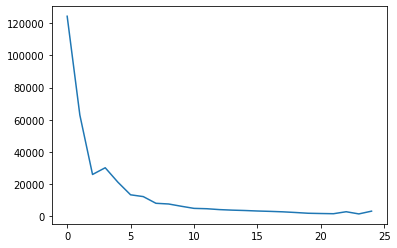

In [65]:
costs = []
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)

    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]

            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                costs.append(test_cost)

plt.plot(costs)
plt.show()

## Tensorflow result 

Error rate is about 35%, which is not good. 

### Shall we normalize the input_data and see if it gives better result?

In [66]:
input_df.columns

Index(['Gender_M', 'Gender_F', 'Gender_nan', 'Married_No', 'Married_Yes',
       'Married_nan', 'Dependent_0', 'Dependent_1', 'Dependent_2',
       'Dependent_3+', 'Dependent_nan', 'Education_G', 'Education_NG',
       'Self_Employed_No', 'Self_Employed_Yes', 'Self_Employed_nan',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History_1', 'Credit_History_0',
       'Credit_History_nan', 'Property_Area_Urban', 'Property_Area_Rural',
       'Property_Area_Semiurban'],
      dtype='object')

In [67]:
input_df_normal = input_df.copy()

In [68]:
mu = mean(input_df_normal.ApplicantIncome)
std = stdev(input_df_normal.ApplicantIncome)

In [69]:
for i in range(len(input_df)):
    input_df_normal.loc[i, 'ApplicantIncome'] = (input_df_normal.ApplicantIncome[i] - mu)/std

In [70]:
mu = mean(input_df_normal.CoapplicantIncome)
std = stdev(input_df_normal.CoapplicantIncome)

for i in range(len(input_df)):
    input_df_normal.loc[i, 'CoapplicantIncome'] = (input_df_normal.CoapplicantIncome[i] - mu)/std

In [71]:
mu = mean(input_df_normal.LoanAmount)
std = stdev(input_df_normal.LoanAmount)

for i in range(len(input_df)):
    input_df_normal.loc[i, 'LoanAmount'] = (input_df_normal.LoanAmount[i] - mu)/std

In [72]:
mu = mean(input_df_normal.Loan_Amount_Term)
std = stdev(input_df_normal.Loan_Amount_Term)

for i in range(len(input_df)):
    input_df_normal.loc[i, 'Loan_Amount_Term'] = (input_df_normal.Loan_Amount_Term[i] - mu)/std

In [73]:
input_data = input_df_normal.values

In [74]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_data, y, test_size=0.2, random_state=42)

In [75]:
Z1 = tf.nn.relu(tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

Cost / err at iteration i=0, j=0: 95.371 / 0.472
Cost / err at iteration i=1, j=0: 89.516 / 0.447
Cost / err at iteration i=2, j=0: 85.254 / 0.423
Cost / err at iteration i=3, j=0: 82.028 / 0.366
Cost / err at iteration i=4, j=0: 79.585 / 0.366
Cost / err at iteration i=5, j=0: 77.679 / 0.358
Cost / err at iteration i=6, j=0: 76.101 / 0.366
Cost / err at iteration i=7, j=0: 74.796 / 0.341
Cost / err at iteration i=8, j=0: 73.837 / 0.325
Cost / err at iteration i=9, j=0: 73.112 / 0.325
Cost / err at iteration i=10, j=0: 72.606 / 0.309
Cost / err at iteration i=11, j=0: 72.261 / 0.285
Cost / err at iteration i=12, j=0: 72.028 / 0.285
Cost / err at iteration i=13, j=0: 71.870 / 0.276
Cost / err at iteration i=14, j=0: 71.750 / 0.260
Cost / err at iteration i=15, j=0: 71.667 / 0.252
Cost / err at iteration i=16, j=0: 71.643 / 0.236
Cost / err at iteration i=17, j=0: 71.670 / 0.236
Cost / err at iteration i=18, j=0: 71.760 / 0.236
Cost / err at iteration i=19, j=0: 71.881 / 0.236
Cost / err

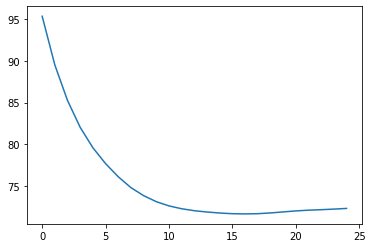

In [76]:
costs = []
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)

    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]

            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                costs.append(test_cost)

plt.plot(costs)
plt.show()

### Improved result with error rate 22%.  Note we normalized data and used activation function is softmax.  

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(input_data, y, test_size=0.2, random_state=42)

## Let's use other machine learning using sklearn.  

In [78]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

y_pred = clf.fit(X_train, Y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))
print("Accuracy is ",  (Y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 123 points : 72
Accuracy is  0.4146341463414634


In [79]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))
print("Accuracy is ",  (Y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 123 points : 35
Accuracy is  0.7154471544715447


In [83]:
from sklearn import svm

clf = svm.SVC(gamma='scale')

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))
print("Accuracy is ",  (Y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 123 points : 26
Accuracy is  0.7886178861788617


In [81]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))
print("Accuracy is ",  (Y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 123 points : 40
Accuracy is  0.6747967479674797


In [82]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))
print("Accuracy is ",  (Y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 123 points : 34
Accuracy is  0.7235772357723578


The best one is naive bayesian with accuracy 77%.  That is not impressive result either.  

Interesting result is SVM result has been increased with almost 80% accuracy.  This is with normalized data and softmax activation function. 